# TSP

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


9

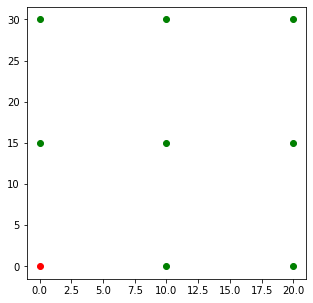

In [2]:
rnd = np.random
rnd.seed(429)


xc = [j*10 for i in range(3) for j in range(0,3)]
yc = [i*15 for i in range(3) for j in range(0,3)]


plt.figure(figsize=(5,5))
plt.scatter(xc[1:],yc[1:],c='g')
plt.scatter(xc[0],yc[0],c='r')
len(xc)


In [3]:
# N = Kunden i
# M = Standorte j
n = 9
N = [i for i in range(0, n)]


A = [(i,j) for i in N for j in N]
c = {(i,j):np.hypot(xc[i]-xc[j],yc[i]-yc[j]) for (i,j) in A}
c



{(0, 0): 0.0,
 (0, 1): 10.0,
 (0, 2): 20.0,
 (0, 3): 15.0,
 (0, 4): 18.027756377319946,
 (0, 5): 25.0,
 (0, 6): 30.0,
 (0, 7): 31.622776601683793,
 (0, 8): 36.05551275463989,
 (1, 0): 10.0,
 (1, 1): 0.0,
 (1, 2): 10.0,
 (1, 3): 18.027756377319946,
 (1, 4): 15.0,
 (1, 5): 18.027756377319946,
 (1, 6): 31.622776601683793,
 (1, 7): 30.0,
 (1, 8): 31.622776601683793,
 (2, 0): 20.0,
 (2, 1): 10.0,
 (2, 2): 0.0,
 (2, 3): 25.0,
 (2, 4): 18.027756377319946,
 (2, 5): 15.0,
 (2, 6): 36.05551275463989,
 (2, 7): 31.622776601683793,
 (2, 8): 30.0,
 (3, 0): 15.0,
 (3, 1): 18.027756377319946,
 (3, 2): 25.0,
 (3, 3): 0.0,
 (3, 4): 10.0,
 (3, 5): 20.0,
 (3, 6): 15.0,
 (3, 7): 18.027756377319946,
 (3, 8): 25.0,
 (4, 0): 18.027756377319946,
 (4, 1): 15.0,
 (4, 2): 18.027756377319946,
 (4, 3): 10.0,
 (4, 4): 0.0,
 (4, 5): 10.0,
 (4, 6): 18.027756377319946,
 (4, 7): 15.0,
 (4, 8): 18.027756377319946,
 (5, 0): 25.0,
 (5, 1): 18.027756377319946,
 (5, 2): 15.0,
 (5, 3): 20.0,
 (5, 4): 10.0,
 (5, 5): 0.0,
 (5, 

In [4]:
from gurobipy import Model, GRB, quicksum
mdl = Model("TSP")
M = 10
x = mdl.addVars(A, vtype=GRB.BINARY )
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*c[i,j] for i,j in A))
mdl.addConstrs(quicksum(x[i, j] for j in N if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[j, i] for i in N if i != j) == 1 for i in N)
mdl.addConstrs((x[i, j] == 1) >> (u[i]-u[j] <= -1) for i, j in A if i!=0 and j!=0)



mdl.addConstr(u[0] == 1)
mdl.addConstrs(u[i] >= 2 for i in N if i!=0)
mdl.addConstrs(u[i] <= n for i in N if i!=0)

mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 15

mdl.optimize()
        

Set parameter Username
Academic license - for non-commercial use only - expires 2022-03-22


NameError: name 'j' is not defined

In [5]:
active_arcs = [a for a in A if x[a].getAttr("x") > 0.9]
active_arcs


AttributeError: Index out of range for attribute 'X'

0 1
1 0
2 1
3 4
4 1
5 4
6 7
7 4
8 7


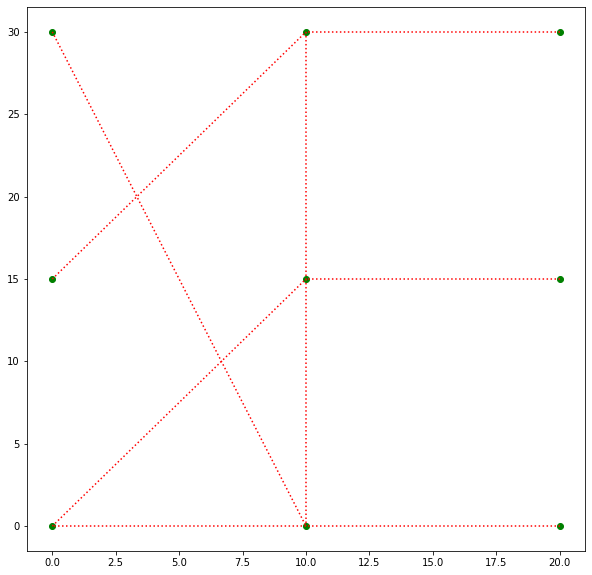

In [103]:



plt.figure(figsize=(10,10))
plt.scatter(xc,yc,c='g')
#plt.scatter(xf,yf,c='b')
for i,j in active_arcs:
    print(i,j)
    plt.plot([xc[i],xc[j]],[yc[i-1],yc[j]], c="r", linestyle='dotted')
    #plt.plot()